In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [485]:
df = pd.read_pickle('extraction_pipeline/agreement_features_join_projects.pkl')
# df_sectors = pd.read_pickle('classification/predicted_sectors_2.pkl')
# df = df.join(df_sectors[['id', 'predicted_sector']].set_index('id'), on = 'id')
# df['date'] = pd.to_datetime(df['date'])

In [486]:
df.head()

,id,date,country_code,country_name,named_countries,Project Name,project_desc,amount_standard,currency_standard,closing_month,...,loan_length in year,wb_project_id,major_sector_name,sector1_name,sector2_name,sector3_name,predicted_sector,amount_cur_usd,country_code_,cur_stand
0,658601468273303198,1990-01-05,jo,Jordan,"[Jordan, United States]",Industry and Trade Policy Adjustment Loan,SCHEDULE 1\n\n Withdrawal of the Procee...,150000000.0,us dollar,December,...,2.0,None,NaN,NaN,NaN,NaN,Industry and Trade/Services,NaN,JOR,USD
1,784351468234894668,1990-01-10,br,Brazil,"[Brazil, United States]",Third Agricultural Research Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,47000000.0,us dollar,June,...,5.0,None,NaN,NaN,NaN,NaN,Agriculture,NaN,BRA,USD
2,891941468049466312,1990-01-11,ma,Malaysia,"[Malaysia, United States]",Rubber Industry Smallholders\n Deve...,SCHEDULE 2\n\n Description of the...,71000000.0,us dollar,December,...,3.0,None,NaN,NaN,NaN,NaN,Agriculture,NaN,MYS,USD
3,125511468051878371,1990-01-11,ma,Malaysia,"[Malaysia, United States]",Highway Rehabilitation and Improvement Project,SCHEDULE 2\n\n Description of the...,83200000.0,us dollar,June,...,5.0,P099112,Transportation,Rural and Inter-Urban Roads,Sub-National Government,NaN,Transportation,NaN,MYS,USD
4,733341468033245855,1990-01-16,ivc,Cote d'Ivoire,[United States],Abidjan Environmental Protection Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,21900000.0,us dollar,December,...,3.0,None,NaN,NaN,NaN,NaN,Public Admin,NaN,CIV,USD


In [487]:
df['currency_standard'].unique()

array(['us dollar', '', 'dem', 'french francs', 'yen', 'euro',
       'egyptian pounds', 'gbp'], dtype=object)

In [488]:
currency_map = {'us dollar': 'USD', 'euro': 'EUR', 'dem': 'DEM', 
                'french francs': 'FRF', 'gbp': 'GBP', 'egyptian pounds': 'EGP', 'yen': 'JPY'}
def get_stand_curr(x):
    try:
        return currency_map[x]
    except:
        return None
df['cur_stand'] = df['currency_standard'].apply(get_stand_curr)
# df = df[~df['cur_usd'].isin(['EGP'])]
df['cur_stand'].unique()

array(['USD', None, 'DEM', 'FRF', 'JPY', 'EUR', 'EGP', 'GBP'],
      dtype=object)

In [489]:
from currency_converter import CurrencyConverter
c = CurrencyConverter(fallback_on_missing_rate=True)

In [490]:
df[df.amount_cur_usd.notna()]

,id,date,country_code,country_name,named_countries,Project Name,project_desc,amount_standard,currency_standard,closing_month,...,loan_length in year,wb_project_id,major_sector_name,sector1_name,sector2_name,sector3_name,predicted_sector,amount_cur_usd,country_code_,cur_stand
1243,392401468231871368,1999-01-20,hr,Croatia,"[Germany, Croatia, United States]",Railway Modernization and Restructuring Project,SCHEDULE 2 \n\nDescription of the Project\n\nT...,85400000.0,euro,June,...,4.0,P039161,Transportation,Railways,Social Protection,NaN,Transportation,98850500.0,HRV,EUR
1244,285271468095363256,1999-01-20,ro,Romania,"[Bulgaria, Romania, United States]",Social Development Fund Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,10000000.0,us dollar,June,...,3.0,P008204,Health,Health,Early Childhood Education,Central Government (Central Agencies),Health,10000000.0,ROU,USD
1245,738661468332674245,1999-01-21,pak,Pakistan,"[Pakistan, United States]",Structural Adjustment Loan,SCHEDULE 1\n\nExcluded Expenditures\n\nFor pur...,350000000.0,us dollar,June,...,0.0,None,NaN,NaN,NaN,NaN,Financial Sector,350000000.0,PAK,USD
1246,469841468295188118,1999-01-29,in,India,"[India, United States]",Andhra Pradesh Economic Restructuring Project,None,301300000.0,us dollar,March,...,5.0,None,NaN,NaN,NaN,NaN,NaN,301300000.0,IND,USD
1247,617561468256168053,1999-02-04,in,India,"[India, United States]",Andhra Pradesh Economic Restructuring Project,None,301300000.0,us dollar,March,...,5.0,None,NaN,NaN,NaN,NaN,NaN,301300000.0,IND,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,539191576006466769,2019-11-28,by,Belarus,"[Belarus, United States]",Sustainable Energy Scale-Up Project,SCHEDULE 1\n\nProject Description\n\nThe objec...,90000000.0,euro,April,...,6.0,None,NaN,NaN,NaN,NaN,Energy and Extractives,99045000.0,BLR,EUR
3189,859161577483616466,2019-11-28,yf,Serbia,"[Serbia, United States]",Additional Financing for Real Estate Managemen...,SCHEDULE 1\n\nProject Description\n\nThe objec...,21000000.0,euro,December,...,3.0,None,NaN,NaN,NaN,NaN,Public Admin,23110500.0,SRB,EUR
3190,876531576597901004,2019-12-04,br,Brazil,[United States],SABESP - Improving Water Service Access and Se...,SCHEDULE1\n\nProject Description\n\nThe object...,250000000.0,us dollar,June,...,6.0,None,NaN,NaN,NaN,NaN,Water/Sanitation/Waste,250000000.0,BRA,USD
3191,430041576700944955,2019-12-05,ke,Kenya,"[Kenya, United States]",Affordable Housing Finance Project,SCHEDULE 1\n\nProject Description\n\nThe objec...,219000000.0,euro,June,...,5.0,P165034,Financial Sector,Banking Institutions,Housing Construction,"Public Administration - Industry, Trade and Se...",Financial Sector,242958600.0,KEN,EUR


In [491]:
def get_usd(x):
    try:
        return c.convert(x['amount_standard'], x['cur_stand'], 'USD', x['date'])
    except:
        return None
df['amount_cur_usd'] = df.apply(get_usd, axis = 1)

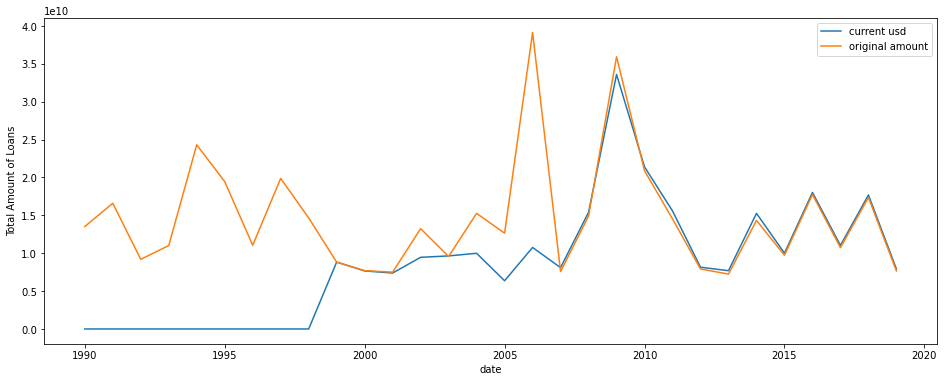

In [492]:
plt.figure(figsize = (16,6))
df.groupby(df.date.dt.year)['amount_cur_usd'].sum().plot(label = 'current usd')
df.groupby(df.date.dt.year)['amount_standard'].sum().plot(label = 'original amount' )
plt.ylabel('Total Amount of Loans')
plt.legend()

In [493]:
# Get Country Code
df_ct = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
country_map = {}
for i in range(len(df_ct)):
    country_name, country_code = df_ct.loc[i,'COUNTRY'], df_ct.loc[i,'CODE']
    country_map[country_name] = country_code
    
country_map['Korea'] = country_map['Korea, South']
country_map["People's Republic of the Congo"] = country_map['Congo, Republic of the']
country_map["Congo"] = country_map['Congo, Democratic Republic of the']
country_map['Cape Verde'] = country_map['Cabo Verde']
country_map["Côte d'Ivoire"] = country_map["Cote d'Ivoire"]
country_map['Venezuela, Bolivarian Republic of'] = country_map["Venezuela"]
country_map['Bolivia, Plurinational State of'] = country_map["Bolivia"]
country_map['Viet Nam'] = country_map["Vietnam"]
country_map['Yugoslavia'] = country_map['Macedonia']
country_map['Macedonia, the former Yugoslav Republic of'] = country_map['Macedonia']
country_map['Moldova, Republic of'] = country_map['Moldova']
country_map['Russian Federation'] = country_map['Russia']
country_map['Slovak Republic'] = country_map['Slovakia']
country_map['Iran, Islamic Republic of'] = country_map['Iran']

def get_country_code(x):
    try:
        return country_map[x]
    except:
        return None
    
df['country_code_'] = df['country_name'].apply(get_country_code)

In [528]:
import plotly.graph_objects as go
import pandas as pd

# dff = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

def plot_heatmap(dff,feature):
    fig = go.Figure(data=go.Choropleth(
        locations = dff['country_code_'],
        z = dff[feature],
        text = dff['country_name'],
        colorscale = 'Oranges',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '$',
        colorbar_title = 'Total Loan Amount<br>Billions current US$',
    ))

    fig.update_layout(
        title_text='World Bank (IBRD) Loans 1999-2019',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="https://github.com/xushuo0/Qarik-Project">\
                Qarik-Project (May 28, 2021)</a>',
            showarrow = False
        )]
    )
    fig.show()

In [529]:
dff = df.groupby(['country_name', 'country_code_'])['amount_cur_usd'].sum().reset_index(name = 'amount sum').sort_values(by='amount sum', ascending = False)
plot_heatmap(dff.dropna(), 'amount sum')

## GDP data

In [496]:
gdp = pd.read_csv('GDP.csv')
years = [str(x) for x in range(1999, 2020)]
gdp = gdp[['Country Code'] + years]
gdp = gdp.set_index('Country Code')
gdp.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,...,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
AFG,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,...,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10
AGO,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,...,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.881570e+10
ALB,3.212119e+09,3.480355e+09,3.922099e+09,4.348070e+09,5.611492e+09,7.184681e+09,8.052076e+09,8.896074e+09,1.067732e+10,1.288135e+10,...,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10
AND,1.239876e+09,1.429049e+09,1.546926e+09,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,...,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09


In [497]:
gdp_sum = gdp.sum(axis = 1).reset_index().rename(columns = {0:'Total GDP Sum'})
gdp_sum 

,Country Code,Total GDP Sum
0,ABW,4.620575e+10
1,AFG,2.484223e+11
2,AGO,1.530008e+12
3,ALB,2.101457e+11
4,AND,6.134999e+10
...,...,...
259,XKX,1.064308e+11
260,YEM,5.018468e+11
261,ZAF,5.914458e+12
262,ZMB,3.369137e+11


In [498]:
df.to_pickle('extraction_pipeline/agreement_features_join_projects.pkl')

In [517]:
df_sum = df.groupby(['country_name', 'country_code_'])['amount_cur_usd'].sum().reset_index(name = 'Loan Amount Sum')
df_sum = df_sum.join(gdp_sum.set_index('Country Code'), on = 'country_code_')
top10 = df_sum.sort_values(by = 'Loan Amount Sum', ascending = False)[:10]
top10 = top10.rename(columns = {'country_name':'Top 10 Countries'})
top10 = top10.set_index('Top 10 Countries', drop = True)
top10

,country_code_,Loan Amount Sum,Total GDP Sum
Top 10 Countries,,,
India,IND,3.111331e+10,3.061801e+13
Brazil,BRA,2.237138e+10,3.191401e+13
China,CHN,2.156715e+10,1.320124e+14
Turkey,TUR,1.899606e+10,1.338644e+13
Indonesia,IDN,1.585007e+10,1.262426e+13
Mexico,MEX,1.365354e+10,2.119379e+13
Egypt,EGY,1.171745e+10,3.989349e+12
Argentina,ARG,1.143420e+10,7.976850e+12
Colombia,COL,1.093057e+10,4.883008e+12


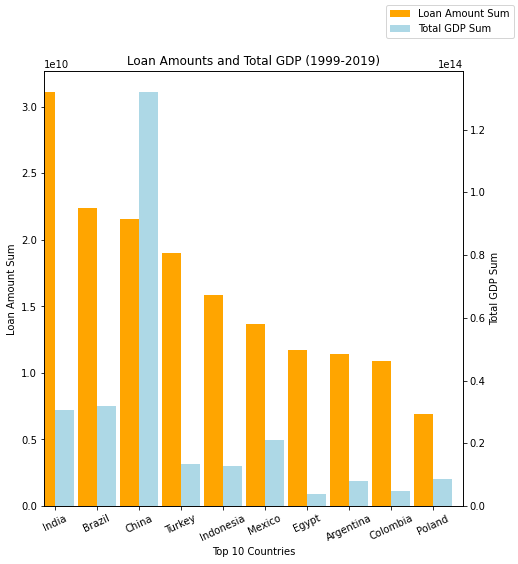

In [521]:
fig = plt.figure(figsize = (7.5,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.45

top10['Loan Amount Sum'].plot(kind='bar', color='orange', ax=ax, width=width, position=1)
top10['Total GDP Sum'].plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0)

ax.set_ylabel('Loan Amount Sum')
ax2.set_ylabel('Total GDP Sum')
fig.legend()
# plt.xticks(rotation=45)
for tick in ax.get_xticklabels():
    tick.set_rotation(25)
plt.title("Loan Amounts and Total GDP (1999-2019)")
plt.show()

In [530]:
df.head()

,id,date,country_code,country_name,named_countries,Project Name,project_desc,amount_standard,currency_standard,closing_month,...,loan_length in year,wb_project_id,major_sector_name,sector1_name,sector2_name,sector3_name,predicted_sector,amount_cur_usd,country_code_,cur_stand
0,658601468273303198,1990-01-05,jo,Jordan,"[Jordan, United States]",Industry and Trade Policy Adjustment Loan,SCHEDULE 1\n\n Withdrawal of the Procee...,150000000.0,us dollar,December,...,2.0,None,NaN,NaN,NaN,NaN,Industry and Trade/Services,NaN,JOR,USD
1,784351468234894668,1990-01-10,br,Brazil,"[Brazil, United States]",Third Agricultural Research Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,47000000.0,us dollar,June,...,5.0,None,NaN,NaN,NaN,NaN,Agriculture,NaN,BRA,USD
2,891941468049466312,1990-01-11,ma,Malaysia,"[Malaysia, United States]",Rubber Industry Smallholders\n Deve...,SCHEDULE 2\n\n Description of the...,71000000.0,us dollar,December,...,3.0,None,NaN,NaN,NaN,NaN,Agriculture,NaN,MYS,USD
3,125511468051878371,1990-01-11,ma,Malaysia,"[Malaysia, United States]",Highway Rehabilitation and Improvement Project,SCHEDULE 2\n\n Description of the...,83200000.0,us dollar,June,...,5.0,P099112,Transportation,Rural and Inter-Urban Roads,Sub-National Government,NaN,Transportation,NaN,MYS,USD
4,733341468033245855,1990-01-16,ivc,Cote d'Ivoire,[United States],Abidjan Environmental Protection Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,21900000.0,us dollar,December,...,3.0,None,NaN,NaN,NaN,NaN,Public Admin,NaN,CIV,USD
